In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import openpyxl as opxl

from itertools import islice
from datetime import timedelta
from datetime import time


### Cargo metadata

In [5]:
# Probar cuando trae solamente un elemento en el arreglo, con strain solamente por ejemplo
data_str = open('MetaTest.json').read()
data = json.loads(data_str)

In [6]:
# Candidato 1

df_json = pd.read_json(data)
columns = [x+str(y) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] for y in range(1,13)]
df_json.columns = columns
df_json.index = ['Strain', 'Media', 'DNA']
df_json

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Strain,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}",...,"{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}"
Media,"{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}",...,"{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}"
DNA,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...",...,"{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF..."


In [7]:
# Candidato 2

# Este funciona traspuesto. Candidato 1 mejor porque está en el mismo orden que el lector
"""
index = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
df_json = pd.read_json(data, orient='index')
df_json.columns = ['Strain', 'Media', 'DNA']
df_json.index = index
df_json
"""

"\nindex = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]\ndf_json = pd.read_json(data, orient='index')\ndf_json.columns = ['Strain', 'Media', 'DNA']\ndf_json.index = index\ndf_json\n"

In [8]:
###########
# Esta info debe ser recibida al inicio de la carga de datos
file_name = 'ExpTest.xlsx'
experiment_name = os.path.basename(file_name).split('/')[-1].split('.')[0]
medidas = ['OD600:600', 'RFP-YFP:585/10,620/15', 'RFP-YFP:500/27,540/25', 'CFP:420/50,485/20', 'Results']
###########
wb = opxl.load_workbook(filename = file_name, data_only=True)
ws = wb['Data']
machine_name = ws['B'][8].value + str(ws['B'][9].value)

name_map = {'OD600:600':'OD', 'RFP-YFP:500/27,540/25':'YFP', 'CFP:420/50,485/20':'CFP',
'RFP-YFP:585/10,620/15':'RFP'}

### Cargo data

In [9]:
lista_rows = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
              for celda in ws['A'] 
              if celda.value in medidas]
lista_rows

[('OD600:600', 47, 1),
 ('RFP-YFP:585/10,620/15', 148, 1),
 ('RFP-YFP:500/27,540/25', 249, 1),
 ('CFP:420/50,485/20', 350, 1),
 ('Results', 451, 1)]

In [10]:
ws.delete_rows(0, 48)

In [11]:
lista_rows2 = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
              for celda in ws['A'] 
              if celda.value in medidas]
lista_rows2

[('RFP-YFP:585/10,620/15', 100, 1),
 ('RFP-YFP:500/27,540/25', 201, 1),
 ('CFP:420/50,485/20', 302, 1),
 ('Results', 403, 1)]

In [12]:
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, columns=cols)

In [13]:
df.columns = df.columns.map(lambda x: x.replace('T° OD600:600', 'T°'))

In [14]:
df_OD = pd.DataFrame(df.iloc[0:lista_rows2[0][1] - 3])
df_OD['name'] = 'OD'

df_RFP = pd.DataFrame(df.iloc[lista_rows2[0][1] + 1:lista_rows2[1][1] - 3])
df_RFP['name'] = 'RFP'
df_RFP.index = range(97)

df_YFP = pd.DataFrame(df.iloc[lista_rows2[1][1] + 1:lista_rows2[2][1] - 3])
df_YFP['name'] = 'YFP'
df_YFP.index = range(97)

df_CFP = pd.DataFrame(df.iloc[lista_rows2[2][1] + 1:lista_rows2[3][1] - 3])
df_CFP['name'] = 'CFP'
df_CFP.index = range(97)

In [15]:
# Código para arreglar los tiempos, si es que necesario
#t = df_OD['Time'].loc[0]
#t.minute
#t2 = time(t.minute-11)
#t2
#for i in df_OD.columns[2:-1]:
    #print("row {}, column {}".format(i[0], i[1]))

### Guardar en BD

De más a menos:

1) Tabla Experiment => Meta experimento: Nombre experimento, (fecha? se puede ingresar en el front), Info máquina

2) Tabla Sample => Meta platillo: row, col, media, strain.

3) Tabla DNA => Meta DNA: name

4) Tabla Measurements => Data measurements: name, value, time

In [17]:
df_OD
# Arreglar el último registro
df_OD = df_OD.drop([96])

,Time,T°,A1,A2,A3,A4,A5,A6,A7,A8,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,name
0,00:11:40,37,0.082,0.083,0.083,0.082,0.082,0.082,0.083,0.083,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
1,00:26:40,37,0.082,0.083,0.084,0.082,0.083,0.082,0.083,0.083,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
2,00:41:40,37,0.082,0.084,0.084,0.082,0.083,0.083,0.084,0.084,...,0.082,0.084,0.082,0.088,0.083,0.082,0.083,0.081,0.084,OD
3,00:56:40,37,0.082,0.085,0.084,0.082,0.084,0.083,0.085,0.084,...,0.083,0.084,0.082,0.089,0.083,0.083,0.083,0.081,0.084,OD
4,01:11:40,37,0.082,0.085,0.085,0.082,0.084,0.084,0.086,0.085,...,0.083,0.084,0.082,0.09,0.083,0.083,0.083,0.081,0.084,OD
5,01:26:40,37,0.081,0.086,0.086,0.083,0.085,0.085,0.087,0.086,...,0.083,0.084,0.082,0.09,0.084,0.083,0.083,0.081,0.085,OD
6,01:41:40,37,0.081,0.088,0.087,0.083,0.085,0.086,0.089,0.087,...,0.083,0.084,0.082,0.09,0.084,0.083,0.084,0.082,0.085,OD
7,01:56:40,37,0.081,0.089,0.088,0.084,0.086,0.088,0.091,0.089,...,0.083,0.085,0.083,0.09,0.084,0.084,0.084,0.082,0.085,OD
8,02:11:40,37,0.081,0.092,0.09,0.084,0.088,0.09,0.094,0.092,...,0.083,0.085,0.083,0.09,0.085,0.084,0.085,0.083,0.085,OD
9,02:26:40,37,0.081,0.095,0.092,0.085,0.09,0.092,0.097,0.096,...,0.084,0.085,0.083,0.087,0.085,0.085,0.085,0.083,0.085,OD


In [123]:
# 1) Experiment
experiment_name
machine_name
# Crear objeto experiment
# e.save()

'Synergy HTX15070916'

In [27]:
# 2) Sample
# get experiment_id
# row, col, media, strain

# 3) DNA
# name

# Empiezo a recorrer los platillos que están en df_json: indexes: strain, media, dna:
for col_name, col_serie in df_json.iteritems():
    # experiment_id
    plate_row = col_name[0]
    plate_col = col_name[1]
    strain = col_serie['Strain']['value']
    media = col_serie['Media']['value']
    # Crear objeto Sample
    # s.save()
    
    # get sample_id
    DNA = col_serie['DNA']['value']
    # Crear objeto DNA
    # d.save()
    
    # 4) Measurement
    # name, value, time
    for i, value in enumerate(df_OD['A1']):
    name = df_OD['name'].iloc[i])
    val = value
    time = df_OD['Time'].iloc[i]
    #sample_id
    
    # Crear objeto measurement
    # m.save()

In [52]:
list(name_map.values())

['OD', 'YFP', 'CFP', 'RFP']

In [56]:
df_json.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4',
       'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
      dtype='object')

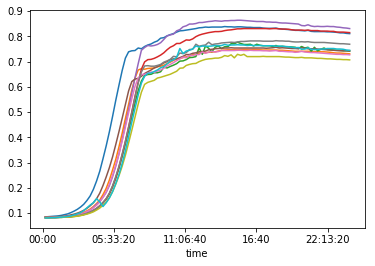

In [63]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
for i in columnas:
    #print(i)
    plt.plot(df_OD['Time'], df_OD[i])
plt.show()